In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Percentage of women who survived : ",rate_women)

Percentage of women who survived :  0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Percentage of men who survived : ",rate_men)

Percentage of men who survived :  0.18890814558058924


In [6]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
train_data[['Survived','Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [12]:
train_data[['Survived','SibSp']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
train_data[['Survived','Parch']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [14]:
train_data[['Survived','Age']].groupby(['Age']).mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


<AxesSubplot:>

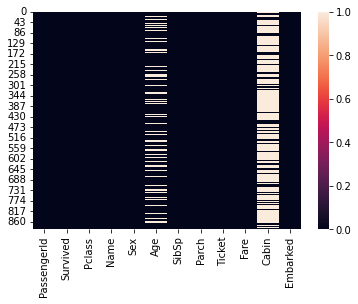

In [15]:
import seaborn as sb
sb.heatmap(train_data.isnull())

In [16]:
train_data[['Survived','Fare']].groupby(['Fare']).mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


In [17]:
train_data[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [18]:
train_data[['Survived','Ticket']].groupby(['Ticket']).mean()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


In [19]:
train_data[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [20]:
train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].groupby(['Survived']).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


***Dropping features with lesser relevance to survival***

In [21]:
train_data=train_data.drop(['PassengerId','Name','Ticket','Cabin',],axis=1)

In [22]:
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


***Filling missing values in Embarked***

In [24]:
train_data.Embarked=train_data.Embarked.fillna(train_data.Embarked.mode().iloc[0])

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


***Filling missing values in Age***

In [26]:
import random
mean_age=train_data.Age.mean()
stdd_age=train_data.Age.std()
for i in range(0,len(train_data)-1):
    if np.isnan(train_data.Age[i]):
        train_data.Age[i]=random.uniform(mean_age,stdd_age)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


***Categorizing Age in Groups***

In [28]:
for i in range(0, len(train_data)):
    if train_data.Age[i]>= 0 and train_data.Age[i]< 20:
        train_data.Age[i]=0
    elif train_data.Age[i]>=20 and train_data.Age[i]< 40:
        train_data.Age[i]=1
    elif train_data.Age[i]>= 40 and train_data.Age[i]< 60:
        train_data.Age[i]=2
    elif train_data.Age[i]>= 60 and train_data.Age[i]< 80:
        train_data.Age[i]=3 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib

In [29]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,1.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,1.0,1,0,53.1000,S
4,0,3,male,1.0,0,0,8.0500,S


***Categorizing Fare in Groups***

In [30]:
for i in range(0, len(train_data)):
    if train_data.Fare[i]>= 0 and train_data.Fare[i]< 100:
        train_data.Fare[i]=0
    elif train_data.Fare[i]>= 100 and train_data.Fare[i]< 200:
        train_data.Fare[i]=1
    elif train_data.Fare[i]>= 200 and train_data.Fare[i]< 300:
        train_data.Fare[i]=2
    elif train_data.Fare[i]>= 300 and train_data.Fare[i]< 400:
        train_data.Fare[i]=3    
    elif train_data.Fare[i]>= 400 and train_data.Fare[i]< 515:
        train_data.Fare[i]=4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib

In [31]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,0.0,S
1,1,1,female,1.0,1,0,0.0,C
2,1,3,female,1.0,0,0,0.0,S
3,1,1,female,1.0,1,0,0.0,S
4,0,3,male,1.0,0,0,0.0,S


***Converting to Ordinal Values***

In [32]:
train_data['Sex'] = train_data['Sex'].map({'male':1, 'female':0})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [33]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1.0,1,0,0.0,2
1,1,1,0,1.0,1,0,0.0,0
2,1,3,0,1.0,0,0,0.0,2
3,1,1,0,1.0,1,0,0.0,2
4,0,3,1,1.0,0,0,0.0,2


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
train_input, test_input, train_output, test_output = train_test_split(train_data.drop(['Survived'],axis=1), train_data['Survived'],test_size=0.2)
dtm = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dtm.fit(train_input,train_output)
predictions = dtm.predict(test_input)
accuracy=accuracy_score(test_output,predictions)
accuracy

0.7877094972067039

***1.3 Plot : Decision Tree Model***

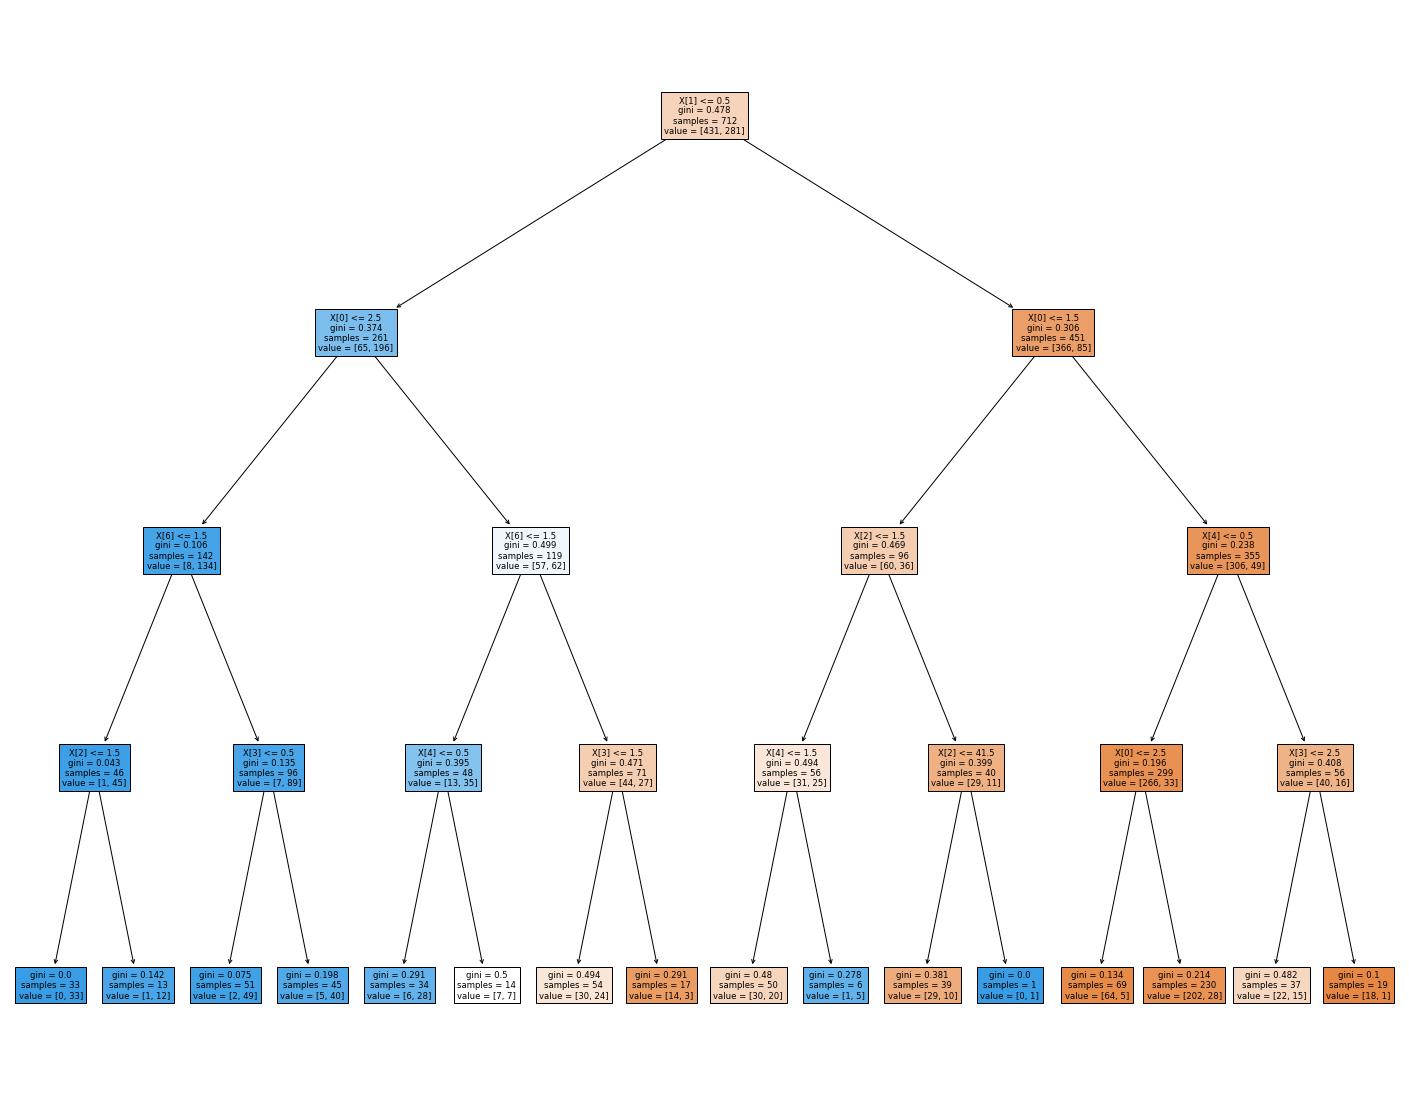

In [35]:
import matplotlib.pyplot as plt
p_dtm = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtm, filled=True)


***1.4 Five-fold cross validation : Decision tree learning model***

In [36]:
from sklearn.model_selection import cross_val_score
dt_cv = cross_val_score(dtm, train_input, train_output,cv=5)
dt_cv.mean()

0.8103516202107752

***1.5 Five-fold cross validation : Random Forest learning model***

In [37]:
from sklearn.ensemble import RandomForestClassifier
dtm = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4, random_state=0)
dtm.fit(train_input, train_output)
dt_cv = cross_val_score(dtm, train_input, train_output,cv=5)
dt_cv.mean()

0.8117108243868808

***1.1 Preprocessing the Titanic training data
        a)Analysing correlation of features with Survival
        b)Dropping features with lesser relevance to survival
        c)Filling missing values
        d)Converting to Ordinal Values***

***1.2 The set of important features which are selected are Pclass, Sex, Age, Sibsp, Parch, Fare, Embarked for determining the Survival. As mentioned in the preprocessing step, we use correlation between the features and survival and select the features which highly impact on survival. We drop the features which are not relevant to determine the survival.***

***1.6 Random Forest algorithm is better as compared to Decision Tree algorithm as they have classification accuracies of 81.18% and 80.34% respectively***

***1.7 As we do more and more splits in decision trees, the accuracy keeps on increasing till we might need to deal with overfitting if we don't know when to stop. But incase of random forest, we build multiple decision trees and then take voting to determine the final tree which reduces the overfitting issue.***

In [38]:
from sklearn import svm
SVM_L = svm.SVC(kernel='linear')
dt_cv = cross_val_score(SVM_L, train_input, train_output,cv=5)
dt_cv.mean()

0.7892544075642668

In [39]:
from sklearn import svm
SVM_Q = svm.SVC(kernel='poly',degree=2)
dt_cv = cross_val_score(SVM_Q, train_input, train_output,cv=5)
dt_cv.mean()

0.7906234610459962

In [40]:
from sklearn import svm
SVM_RBF = svm.SVC(kernel='rbf')
dt_cv = cross_val_score(SVM_RBF, train_input, train_output,cv=5)
dt_cv.mean()

0.8018812173741751